In [7]:
# Importing the required libraries

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [8]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [9]:
# Function Defintions

# Function to plot a degree distribution graph (P(k) vs k graph)
def plot_indegree_dist(G):
    
    degrees = [G.in_degree(n) for n in G.nodes()]
    
    kmin = min(degrees)
    #print("min in degree: ", kmin)
    kmax = max(degrees)
    #print("max in degree: ", kmax)
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=50)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num= 50)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"in degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    

In [10]:
# Function Defintions

# Function to plot a degree distribution graph (P(k) vs k graph)
def plot_outdegree_dist(G):
    
    degrees = [G.out_degree(n) for n in G.nodes()]
    
    kmin = min(degrees)
    #print("min out degree: ", kmin)
    kmax = max(degrees)
    #print("max out degree: ", kmax)
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=50)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=50)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"out degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [11]:
# Function Defintions

# Function to plot a degree distribution graph (P(k) vs k graph)
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]

    kmin = min(degrees)
    #print("min out degree: ", kmin)
    kmax = max(degrees)
    #print("max out degree: ", kmax)
   
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=50)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=50)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [12]:
def plotAll(G: nx.Graph):
    indegrees = [G.in_degree(n) for n in G.nodes()]
    outdegrees = [G.out_degree(n) for n in G.nodes()]
    degrees = [G.degree(n) for n in G.nodes()]
    
    kmin = min(min(degrees), min(outdegrees), min(indegrees))
    kmax = max(max(degrees), max(outdegrees), max(indegrees))
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=50)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=50)
    degree, _ = np.histogram(degrees, bins=bin_edges, density=True)
    indegree, _ = np.histogram(indegrees, bins=bin_edges, density=True)
    outdegree, _ = np.histogram(outdegrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    
    plt.loglog(x, degree, marker='o', linestyle='none', color='g')
    plt.loglog(x, indegree, marker='o', linestyle='none', color='r')
    plt.loglog(x, outdegree, marker='o', linestyle='none', color='b')
    
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

Followers network degree distribution:

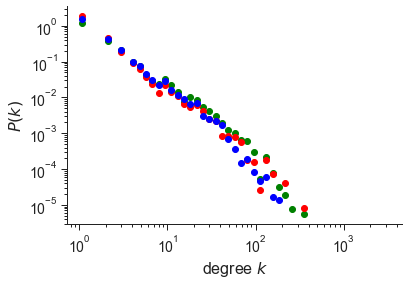

In [15]:
G = nx.read_edgelist('../networks/followers/edges.csv',
                     create_using=nx.DiGraph(),delimiter = ', ')
                     
plotAll(G)

Forks network degree distribution:

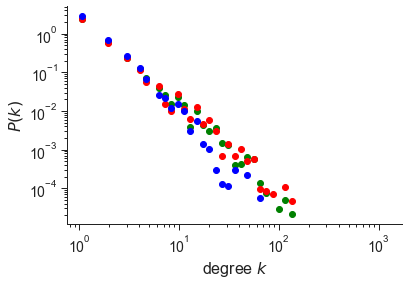

In [16]:
G = nx.read_edgelist('../networks/forks/edges.csv',
                     create_using=nx.DiGraph(),delimiter = ', ')
                     
plotAll(G)